In [33]:
import pandas as pd
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from IPython.display import clear_output
import json
from linear_regression import LinearRegression

In [34]:
data = pd.read_csv("../data.csv")
x: NDArray[np.float64] = data["km"].values.astype(float)
y: NDArray[np.float64] = data["price"].values.astype(float)

model = LinearRegression()

X_norm = model.normalize_X(x.reshape(-1, 1))
model.theta = np.zeros(X_norm.shape[1])

In [35]:
def draw_graph(x_line: NDArray[np.float64], y_line: NDArray[np.float64],
               theta: NDArray[np.float64], iter: int, cost: float) -> None:
        clear_output(wait=True)
        plt.figure(figsize=(6, 4))
        plt.ylim(0, y.max() + 500)
        plt.scatter(x, y)
        plt.plot(x_line, y_line)
        plt.xlabel("Mileage(km)")
        plt.ylabel("price")
        plt.text(
                0.04, 0.2,
                f"θ₀ = {theta[0]}\nθ₁ = {theta[1]}\ncost = {cost}\niter = {iter}",
                transform=plt.gca().transAxes,
                fontsize=10,
                verticalalignment='top'
                )
        plt.show()

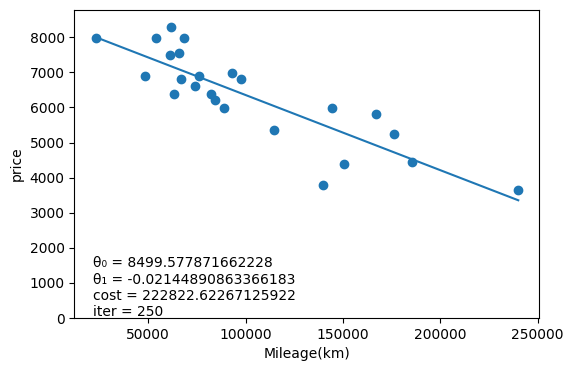

In [36]:
x_line = np.linspace(x.min(), x.max(), 100)
theta: NDArray[np.float64] = np.zeros(X_norm.shape[1])
prev_cost: float = 0

for i in range(model.max_iter):
        model.gradient_step(X_norm, y)
        cost = model.mse_cost(X_norm, y)
        if abs(prev_cost - cost) < model.epsilon:
                break
        elif np.isnan(cost) or cost > 1e12:
                print("Diverged")
                break

        if i % 10 == 0:
                theta = model.unnormalize_theta()
                y_line = theta[0] + theta[1] * x_line
                draw_graph(x_line, y_line, theta, i, cost)

        prev_cost = cost

In [45]:
theta_real = model.unnormalize_theta()

errors: float = (theta_real[0] + theta_real[1]  * x ) - y

mse: float = np.mean(errors ** 2)
rmse: float = np.sqrt(mse)
mae: float = np.mean(np.abs(errors))
r2: float = 1 - np.sum(errors ** 2) / np.sum((y - y.mean()) ** 2)

print(f"MSE (Mean Squared Error)        : {mse}")
print(f"RMSE(Root Mean Squared Error)   : {rmse}")
print(f"MAE (Mean Absolute Error)       : {mae}")
print(f"R²(Coefficient of Determination): {r2}")

MSE (Mean Squared Error)        : 445645.245251223
RMSE(Root Mean Squared Error)   : 667.5666597810462
MAE (Mean Absolute Error)       : 557.8380412405985
R²(Coefficient of Determination): 0.7329747077236729


In [ ]:
data: dict[str, float] = {
        "theta0": float(theta_real[0]),
        "theta1": float(theta_real[1])
}

with open("./model.json", "w") as f:
        json.dump(data, f)

print("Model saved to model.json")
print(f"theta0: {theta_real[0]}")
print(f"theta1: {theta_real[1]}")

Model saved to model.json
theta0: 8499.581911395382
theta1: -0.021448918828034853
